# Thesis Plotter

## Imports and Methods

In [2]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.kinematic_cuts as cuts
import my_library.constants as constants
import my_library.gluex_style as gxs
import numpy as np

Welcome to JupyROOT 6.24/04


In [3]:
def title_hists(hist: list, xtitle, ytitle, yoffset=None):
    for hist in hist:
        hist.GetXaxis().SetTitle(xtitle)
        hist.GetYaxis().SetTitle(ytitle)
        if yoffset:
            hist.GetYaxis().SetTitleOffset(yoffset)

    

# Make Plots for My Thesis 

## Luminosity table in latex form

In [4]:
for e in range(7, 12):
    e_lumi = tools.get_luminosity_gluex_1(e-0.5, e+0.5)
    print("{} & {:0.2f} \\\ \hline".format(e, e_lumi))

7 & 42.73 \\ \hline
8 & 141.07 \\ \hline
9 & 112.30 \\ \hline
10 & 70.81 \\ \hline
11 & 60.14 \\ \hline


## $\Delta t$ table in latex form

In [5]:
for tbin in range(1, 8):
    t_low, t_high = constants.T_CUT_DICT[tbin]
    t_bin_middle = (t_low + t_high) / 2
    t_bin_width = t_high - t_low
    print('{:0.3f} & {:0.3f} \\\ \hline'.format(t_bin_middle, t_bin_width))

0.150 & 0.100 \\ \hline
0.250 & 0.100 \\ \hline
0.350 & 0.100 \\ \hline
0.525 & 0.250 \\ \hline
0.775 & 0.250 \\ \hline
1.150 & 0.500 \\ \hline
1.650 & 0.500 \\ \hline


In [6]:
ROOT.EnableImplicitMT()

In [7]:
df_pipkmks = tools.get_dataframe('pipkmks', 'gluex1', 'data', filtered=False)
df_pimkpks = tools.get_dataframe('pimkpks', 'gluex1', 'data', filtered=False)

## $M^{2}_{x}(pKK\pi)$

In [8]:
mx2_all_bins, mx2_all_xlow, mx2_all_xhigh = 1000, -0.1, 0.1
hist_mx2all_pipkmks = df_pipkmks.Histo1D(('mx2_all_pipkmks', 'mx2_all_pipkmks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks = df_pimkpks.Histo1D(('mx2_all_pimkpks', 'mx2_all_pimkpks', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

hist_mx2all_pipkmks_cut = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT).Histo1D(('mx2_all_pipkmks_cut', 'mx2_all_pipkmks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppipkmks')
hist_mx2all_pimkpks_cut = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT).Histo1D(('mx2_all_pimkpks_cut', 'mx2_all_pimkpks_cut', mx2_all_bins, mx2_all_xlow, mx2_all_xhigh ), 'mx2_ppimkpks')

In [9]:
df_pipkmks = df_pipkmks.Filter(cuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.MX2_PPIMKPKS_CUT)


## $\vec{p}(p')$

In [10]:
pp_bins, pp_xlow, pp_xhigh = 200, 0, 1.9
hist_trange_pipkmks = df_pipkmks.Histo1D(('trange_pipkmks', 'trange_pipkmks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks = df_pimkpks.Histo1D(('trange_pimkpks', 'trange_pimkpks', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pipkmks_cut = df_pipkmks.Filter(cuts.P_P_CUT).Histo1D(('trange_pipkmks_cut', 'trange_pipkmks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')
hist_trange_pimkpks_cut = df_pimkpks.Filter(cuts.P_P_CUT).Histo1D(('trange_pimkpks_cut', 'trange_pimkpks_cut', pp_bins, pp_xlow, pp_xhigh ), 'mand_t')

In [11]:
df_pipkmks = df_pipkmks.Filter(cuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.P_P_CUT)

## $K_s$ Pathlength $\Delta r/\sigma_r$

In [12]:
ks_bins, ks_xlow, ks_xhigh = 1000, 0.35, 0.65

hist_ks_pipkmks = df_pipkmks.Histo1D(('ks_pipkmks', 'ks_pipkmks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks = df_pimkpks.Histo1D(('ks_pimkpks', 'ks_pimkpks', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

hist_ks_pipkmks_cut = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pipkmks_cut', 'ks_pipkmks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')
hist_ks_pimkpks_cut = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT).Histo1D(('ks_pimkpks_cut', 'ks_pimkpks_cut', ks_bins, ks_xlow, ks_xhigh ), 'ks_m')

## $\Delta$ and $N^*$

In [13]:
df_pipkmks = df_pipkmks.Filter(cuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KS_PATHLENGTH_CUT)

In [14]:
ppi_bins, ppi_xlow, ppi_xhigh = 200, 1.0, 3.0
hist_ppi_pipkmks = df_pipkmks.Histo1D(('ppi_pipkmks', 'ppi_pipkmks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks = df_pimkpks.Histo1D(('ppi_pimkpks', 'ppi_pimkpks', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')
hist_ppi_pipkmks_cut = df_pipkmks.Filter(cuts.PPIP_MASS_CUT).Histo1D(('ppi_pipkmks_cut', 'ppi_pipkmks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppip_m')
hist_ppi_pimkpks_cut = df_pimkpks.Filter(cuts.PPIM_MASS_CUT).Histo1D(('ppi_pimkpks_cut', 'ppi_pimkpks_cut', ppi_bins, ppi_xlow, ppi_xhigh ), 'ppim_m')

## $\Lambda/\Sigma$

In [15]:
df_pipkmks = df_pipkmks.Filter(cuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.PPIM_MASS_CUT)

In [16]:
kp_bins, kp_xlow, kp_xhigh = 100, 1.2, 3.5
hist_pks_pipkmks = df_pipkmks.Histo1D(('pks_pipkmks', 'pks_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks = df_pimkpks.Histo1D(('pks_pimkpks', 'pks_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pipkmks_cut = df_pipkmks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pipkmks_cut', 'pks_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')
hist_pks_pimkpks_cut = df_pimkpks.Filter(cuts.KSP_MASS_CUT).Histo1D(('pks_pimkpks_cut', 'pks_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'ksp_m')

hist_pk_pipkmks = df_pipkmks.Histo1D(('pk_pipkmks', 'pk_pipkmks', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks = df_pimkpks.Histo1D(('pk_pimkpks', 'pk_pimkpks', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')
hist_pk_pipkmks_cut = df_pipkmks.Filter(cuts.KMP_MASS_CUT).Histo1D(('pk_pipkmks_cut', 'pk_pipkmks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kmp_m')
hist_pk_pimkpks_cut = df_pimkpks.Filter(cuts.KPP_MASS_CUT).Histo1D(('pk_pimkpks_cut', 'pk_pimkpks_cut', kp_bins, kp_xlow, kp_xhigh ), 'kpp_m')

## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

In [17]:
df_pipkmks = df_pipkmks.Filter(cuts.KSP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KSP_MASS_CUT)

df_pipkmks = df_pipkmks.Filter(cuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(cuts.KPP_MASS_CUT)

In [18]:
kkpi_bins, kkpi_xlow, kkpi_xhigh = 70, 1.1, 1.8

hist_kkpi_no_kstar_pipkmks = df_pipkmks.Histo1D(('kkpi_no_kstar_pipkmks', 'kkpi_no_kstar_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_no_kstar_pimkpks = df_pimkpks.Histo1D(('kkpi_no_kstar_pimkpks', 'kkpi_no_kstar_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## $K^*$ Rejection

In [19]:
hist_kkpi_kstar_rejected_pipkmks = df_pipkmks.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS).Histo1D(('kkpi_kstar_rejected_pipkmks', 'kkpi_kstar_rejected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_rejected_pimkpks = df_pimkpks.Filter(cuts.KSTAR_ALL_CUT_PIMKPKS).Histo1D(('kkpi_kstar_rejected_pimkpks', 'kkpi_kstar_rejected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_neutral_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIPKMKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_neutral_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_NEUTRAL_REJECT_CHARGED_PIMKPKS).Histo1D(('kkpi_kstar_neutral_selected', 'kkpi_kstar_neutral_selected', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

hist_kkpi_kstar_charged_selected_pipkmks = df_pipkmks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIPKMKS).Histo1D(('kkpi_kstar_charged_selected_pipkmks', 'kkpi_kstar_charged_selected_pipkmks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
hist_kkpi_kstar_charged_selected_pimkpks = df_pimkpks.Filter(cuts.KEEP_CHARGED_REJECT_NEUTRAL_PIMKPKS).Histo1D(('kkpi_kstar_charged_selected_pimkpks', 'kkpi_kstar_charged_selected_pimkpks', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pimkpks_m')

## Phasespace cut efficiency

In [20]:
df_pipkmks_phasespace = tools.get_dataframe('pipkmks', 'spring', 'phasespace')
hist_ps_kkpi_before = df_pipkmks_phasespace.Histo1D(('ps_kkpi_before', 'ps_kkpi_before', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')
df_pipkmks_phasespace = df_pipkmks_phasespace.Filter(cuts.KSTAR_ALL_CUT_PIPKMKS)
hist_ps_kkpi_after = df_pipkmks_phasespace.Histo1D(('ps_kkpi_after', 'ps_kkpi_after', kkpi_bins, kkpi_xlow, kkpi_xhigh ), 'pipkmks_m')


## $KK\pi$ after efficiency correction

In [21]:
hist_eff_corrected_pipkmks = tools.get_integrated_gluex1_kstar_corrected_data_hist('pipkmks')
hist_eff_corrected_pimkpks = tools.get_integrated_gluex1_kstar_corrected_data_hist('pimkpks')

/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pipkmks/data/bestX2/pipkmks_flat_result_2017.root
pipkmks_kstar_all_cut_beam_full_t_full;1


/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2018_spring.root
pimkpks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2018_fall.root
pimkpks_kstar_all_cut_beam_full_t_full;1
/work/halld/home/viducic/data/pimkpks/data/bestX2/pimkpks_flat_result_2017.root
pimkpks_kstar_all_cut_beam_full_t_full;1


Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created
Warning in <TH1D::Sumw2>: Sum of squares of weights structure already created


## Acceptance 

In [22]:
pipkmks_eff = []
pimkpks_eff = []

for e in range(8, 12):
    for t in range(1, 8):
        pipkmks_acceptance = tools.get_binned_gluex1_signal_acceptance('pipkmks', e, t)
        pimkpks_acceptance = tools.get_binned_gluex1_signal_acceptance('pimkpks', e, t)

        pipkmks_eff.append((pipkmks_acceptance, e, t))
        pimkpks_eff.append((pimkpks_acceptance, e, t))

/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2017.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_spring.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_fall.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2017.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.1_0.2;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.2_0.3;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_no_c

pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.2_0.3;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2017.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.2_0.3;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_spring.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2018_fall.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_result_2017.root
pipkmks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_spring.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2018_fall.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pimkpks/mc/signal/pimkpks_flat_result_2017.root
pimkpks_kstar_no_cut_beam_7.5_8.5_t_0.3_0.4;1
/work/halld/home/viducic/data/pipkmks/mc/signal/pipkmks_flat_r

## Baryon Background for Asymmetry

In [23]:
# for t in range(1, 8):
    

# Draw Plots

In [24]:
path_to_plots = '/work/halld/home/viducic/plots/thesis/'

In [25]:
c = ROOT.TCanvas('c', 'c', 900, 900)

## $M^{2}_{x}(pKK\pi)$

0.01850184894575386


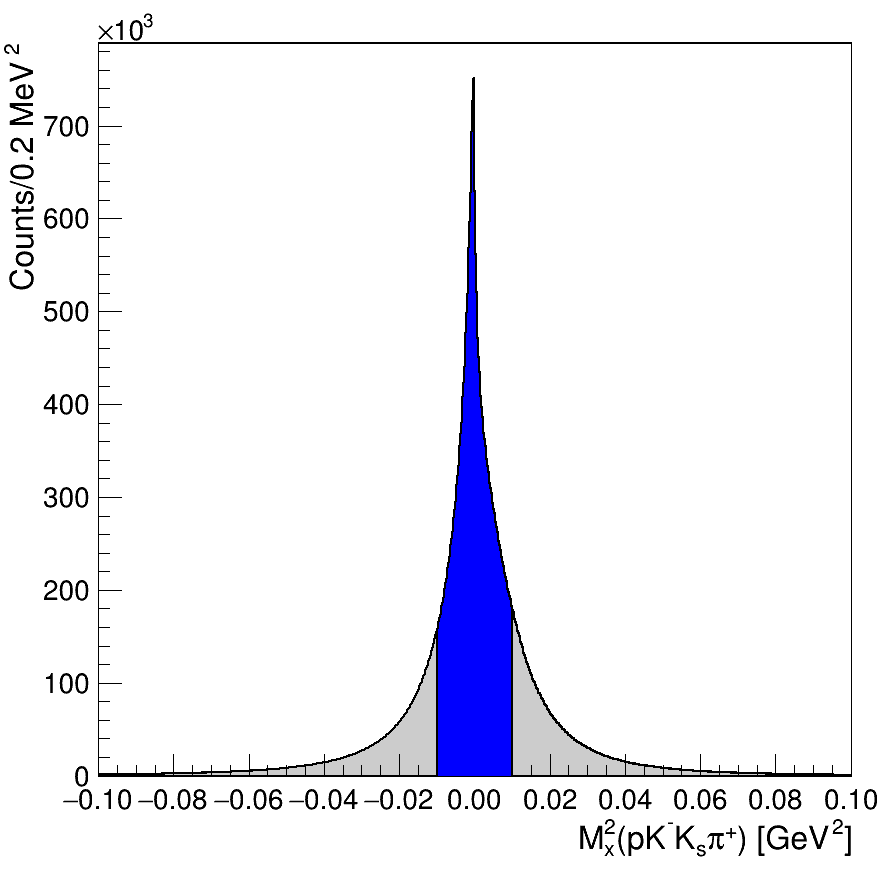

In [26]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.54)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
c.cd(1)
hist_mx2all_pipkmks.Draw()
hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
# hist_mx2all_pimkpks.Draw()
# hist_mx2all_pimkpks_cut.Draw('same')
print(hist_mx2all_pipkmks.GetStdDev())

c.Draw()


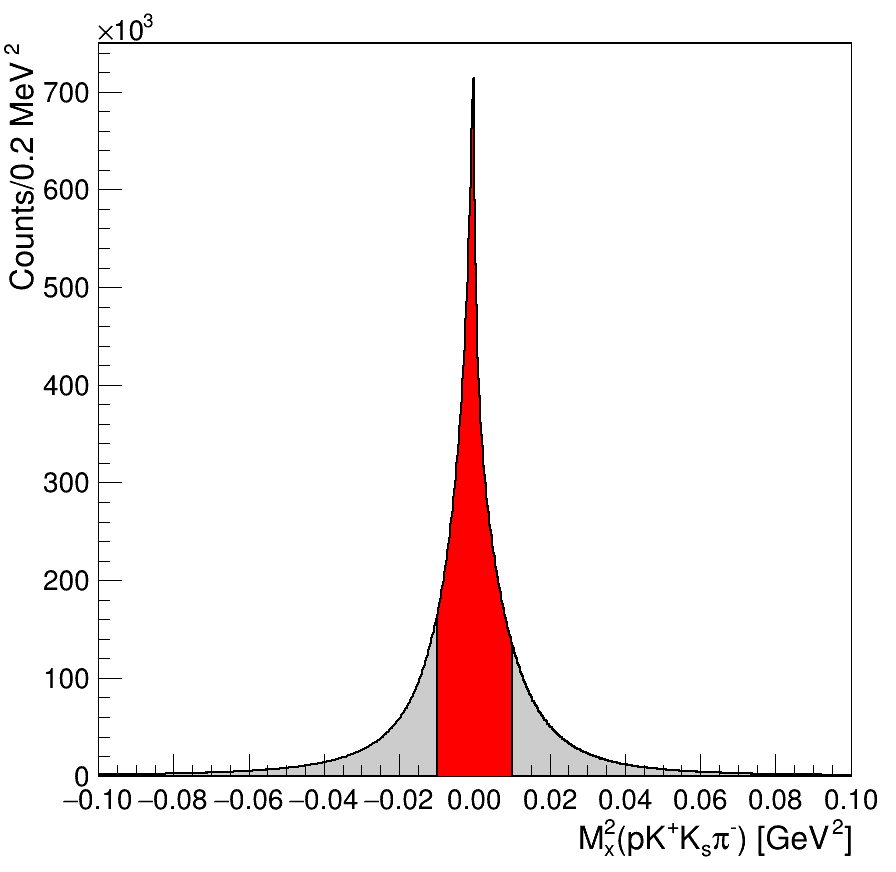

In [27]:
c.Clear()
# c.Divide(2,1)

# mx2all_xtitle = 'M_{x}^{2}(pKK#pi) [GeV^{2}]'
hist_mx2all_pipkmks.GetXaxis().SetTitle('M_{x}^{2}(pK^{-}K_{s}#pi^{+}) [GeV^{2}]')
# mx2all_ytitle = f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.3f}' + ' MeV^{2}'
hist_mx2all_pipkmks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_mx2all_pipkmks.GetYaxis().SetTitleOffset(1.4)
# hist_mx2all_pipkmks.GetXaxis().SetTitleSize(0.05)
hist_mx2all_pipkmks.GetXaxis().SetTitleOffset(1.1)


hist_mx2all_pimkpks.GetXaxis().SetTitle('M_{x}^{2}(pK^{+}K_{s}#pi^{-}) [GeV^{2}]')
hist_mx2all_pimkpks.GetYaxis().SetTitle(f'Counts/{1000*(mx2_all_xhigh-mx2_all_xlow)/mx2_all_bins:.1f}' +  ' MeV^{2}')
hist_mx2all_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_mx2all_pimkpks.GetYaxis().SetTitleOffset(1.4)

# title_hists([hist_mx2all_pimkpks, hist_mx2all_pipkmks], mx2all_xtitle, mx2all_ytitle)
# title_hists([hist_mx2all_pimkpks_cut, hist_mx2all_pipkmks_cut], mx2all_xtitle, mx2all_ytitle)
# c.cd(1)
# hist_mx2all_pipkmks.Draw()
# hist_mx2all_pipkmks_cut.Draw('same')
# c.cd(2)
hist_mx2all_pimkpks.Draw()
hist_mx2all_pimkpks_cut.Draw('same')
# print(hist_mx2all_pipkmks.GetStdDev())

c.Draw()

## $\vec{p}(p')$

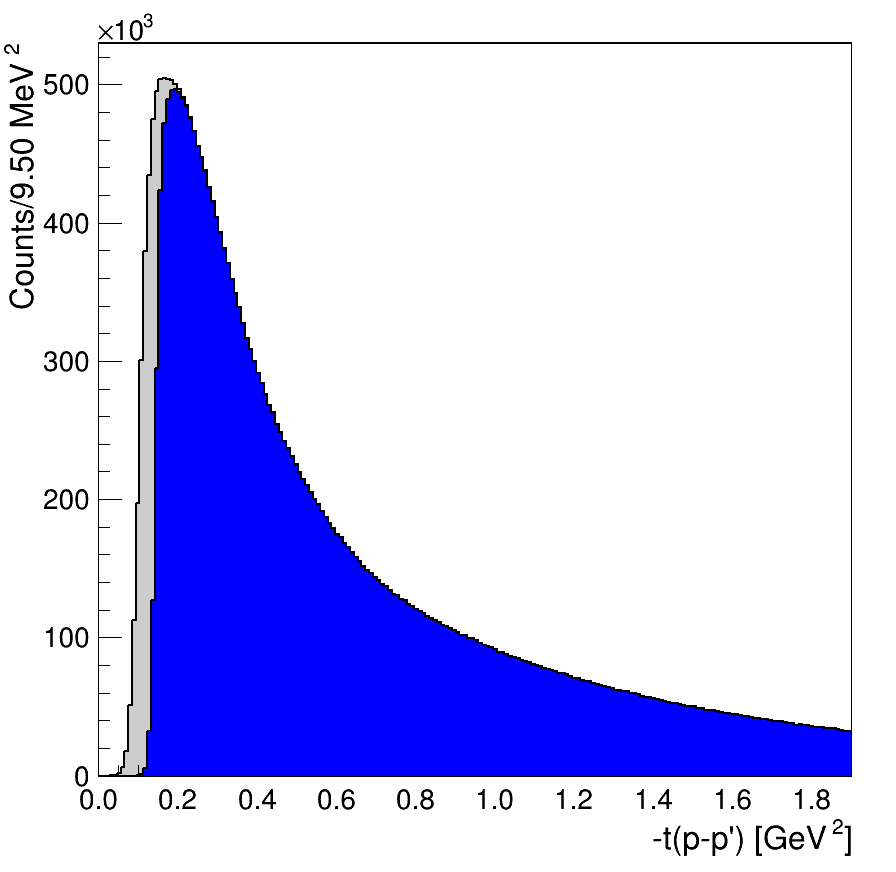

In [28]:
c.Clear()
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pipkmks, hist_trange_pipkmks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pipkmks_cut.SetFillColor(ROOT.kBlue)

hist_trange_pipkmks.Draw()
hist_trange_pipkmks_cut.Draw('same')
c.Draw()


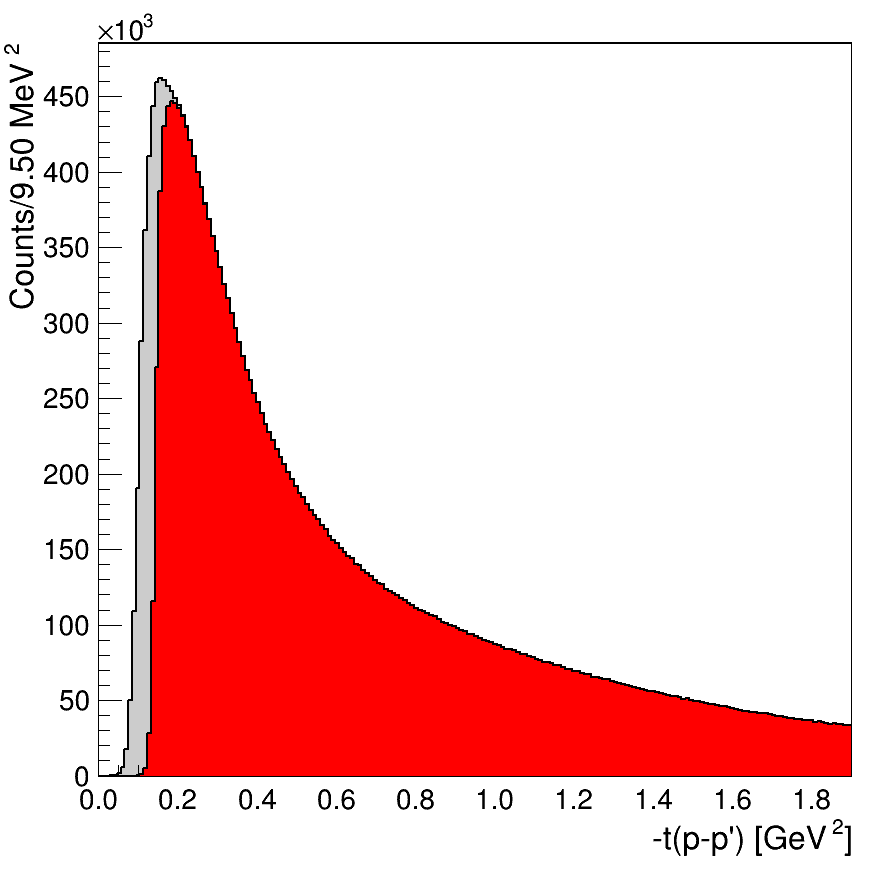

In [29]:
c.Clear()
pp_xtitle = "-t(p-p') [GeV^{2}]"
pp_ytitle = f'Counts/{1000*(pp_xhigh-pp_xlow)/pp_bins:.2f}' + ' MeV^{2}'

title_hists([hist_trange_pimkpks, hist_trange_pimkpks_cut], pp_xtitle, pp_ytitle, yoffset=1.4)

hist_trange_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_trange_pimkpks.Draw()
hist_trange_pimkpks_cut.Draw('same')
c.Draw()

## Pathlength $\Delta r/\sigma_r$

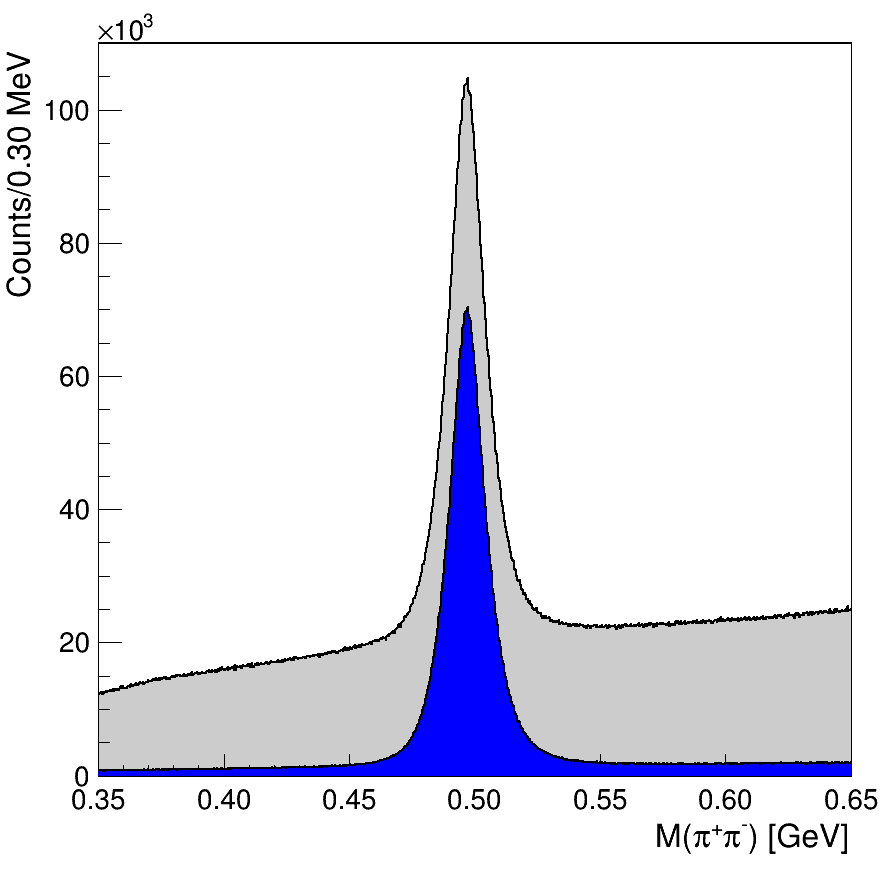

In [30]:
c.Clear()

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pipkmks, hist_ks_pipkmks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_ks_pipkmks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pipkmks.GetMaximum())

hist_ks_pipkmks.Draw()
hist_ks_pipkmks_cut.Draw('same')
c.Draw()

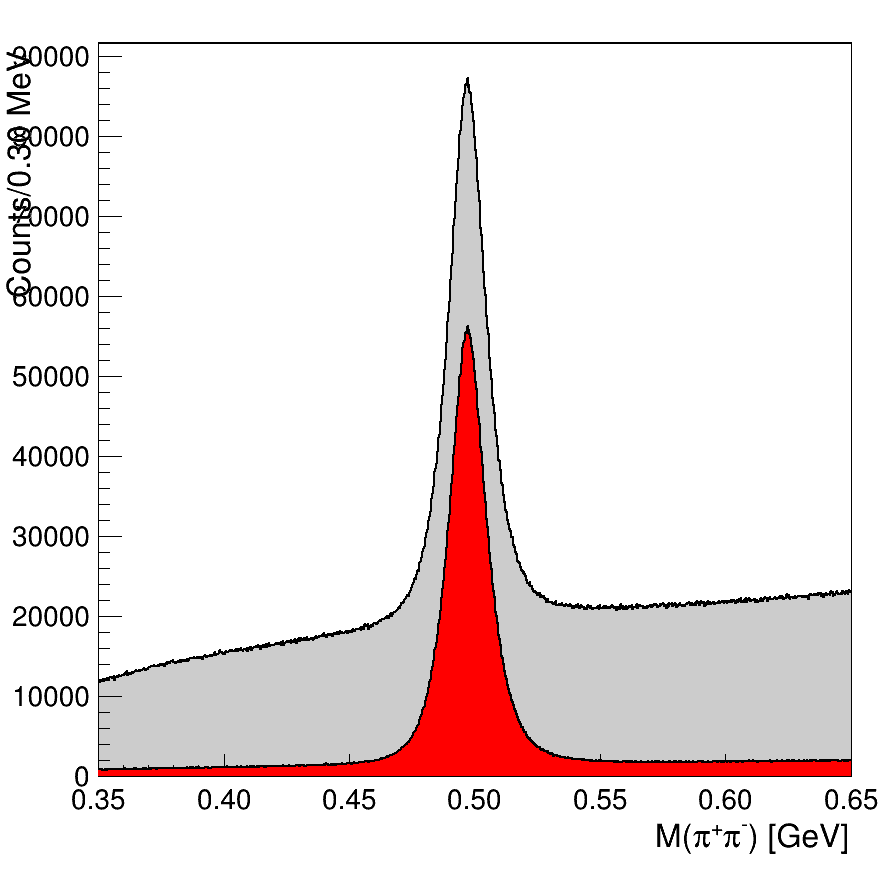

In [31]:
c.Clear()

ks_xtitle = 'M(#pi^{+}#pi^{-}) [GeV]'
ks_ytitle = f'Counts/{1000*(ks_xhigh-ks_xlow)/ks_bins:.2f}' + ' MeV'

title_hists([hist_ks_pimkpks, hist_ks_pimkpks_cut], ks_xtitle, ks_ytitle, yoffset=1.4)


hist_ks_pimkpks_cut.SetFillColor(ROOT.kRed)
hist_ks_pimkpks.GetYaxis().SetRangeUser(0, 1.05*hist_ks_pimkpks.GetMaximum())

hist_ks_pimkpks.Draw()
hist_ks_pimkpks_cut.Draw('same')
c.Draw()

## $\Delta$ and $N^*$

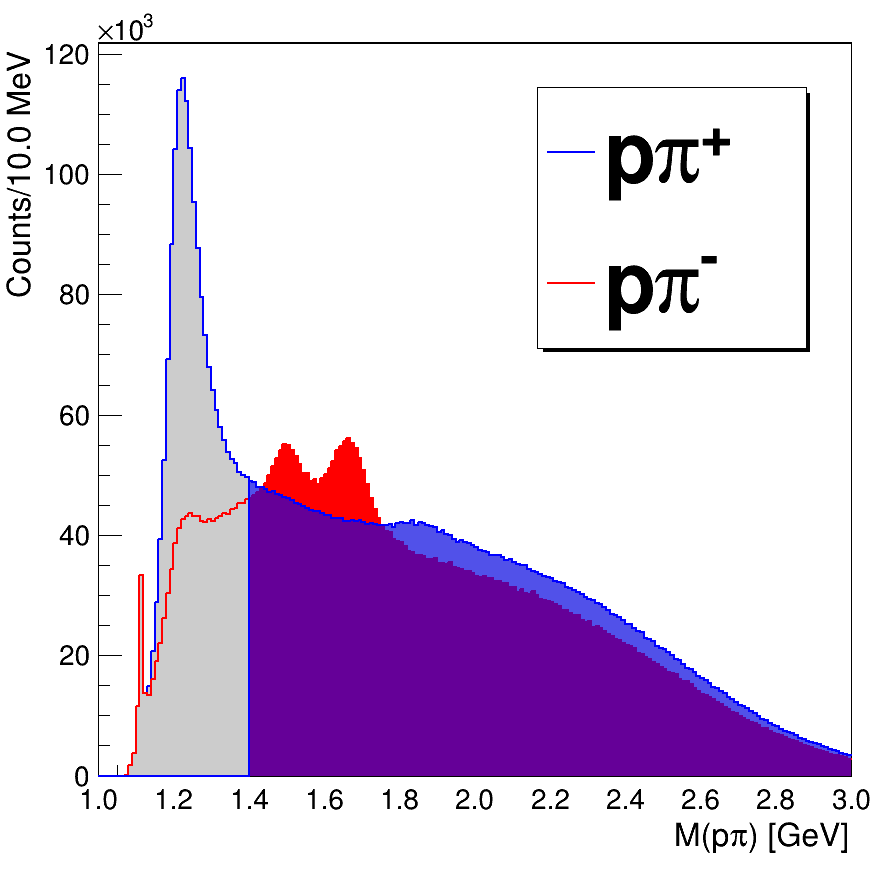

In [32]:
from my_library.common_analysis_tools import sort_hists_by_max


c.Clear()

ppi_xtitle = 'M(p#pi) [GeV]'
ppi_ytitle = f'Counts/{1000*(ppi_xhigh-ppi_xlow)/ppi_bins:.1f}' + ' MeV'

title_hists([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ks_pimkpks_cut], ppi_xtitle, ppi_ytitle, yoffset=1.4)

hist_ppi_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.6)
hist_ppi_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_ppi_pipkmks.SetLineColor(ROOT.kBlue)
hist_ppi_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_ppi_pimkpks.SetLineColor(ROOT.kRed)
hist_ppi_pimkpks_cut.SetLineColor(ROOT.kRed)

ppi_legend = ROOT.TLegend(0.6, 0.6, 0.9, 0.9)
ppi_legend.AddEntry(hist_ppi_pipkmks.GetPtr(), 'p#pi^{+}', 'l')
# ppi_legend.AddEntry(hist_ppi_pipkmks_cut.GetPtrpK^{-}K_{s}#pi^{+} (cut)', 'f')
ppi_legend.AddEntry(hist_ppi_pimkpks.GetPtr(), 'p#pi^{-}', 'l')
# ppi_legend.AddEntry(hist_ppi_pimkpks_cut.GetPtr(), 'pK^{+}K_{s}#pi^{-} (cut)', 'f')

sorted_hists = sort_hists_by_max([hist_ppi_pipkmks, hist_ppi_pipkmks_cut, hist_ppi_pimkpks, hist_ppi_pimkpks_cut])

sorted_hists[0].Draw()
sorted_hists[1].Draw('same')
sorted_hists[2].Draw('same')
sorted_hists[3].Draw('same')
ppi_legend.Draw()
c.Draw()





## $\Lambda/\Sigma$

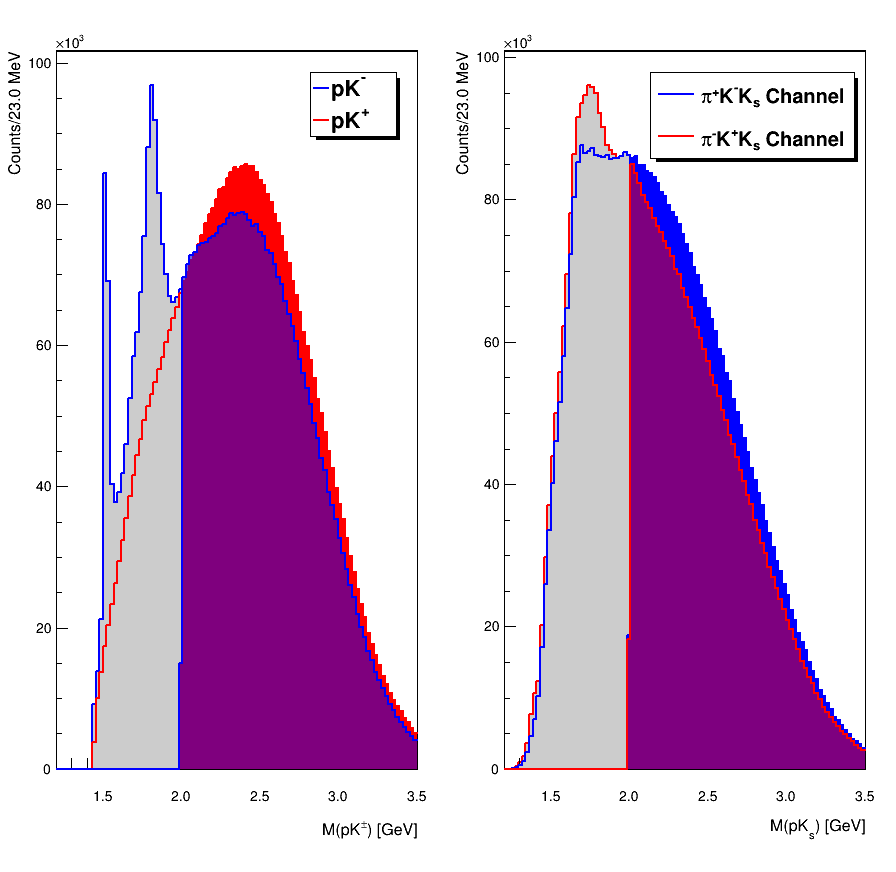

In [33]:
c.Clear()

ksp_xtitle = 'M(pK_{s}) [GeV]'
ksp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

kp_xtitle = 'M(pK^{#pm}) [GeV]'
kp_ytitle = f'Counts/{1000*(kp_xhigh-kp_xlow)/kp_bins:.1f}' + ' MeV'

title_hists([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut], ksp_xtitle, ksp_ytitle, yoffset=1.5)
title_hists([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut], kp_xtitle, kp_ytitle, yoffset=1.5)

hist_pks_pipkmks_cut.SetFillColor(ROOT.kBlue)
hist_pks_pimkpks_cut.SetFillColorAlpha(ROOT.kRed, 0.5)
hist_pk_pipkmks_cut.SetFillColorAlpha(ROOT.kBlue, 0.5)
hist_pk_pimkpks_cut.SetFillColor(ROOT.kRed)

hist_pks_pipkmks.SetLineColor(ROOT.kBlue)
hist_pks_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pks_pimkpks.SetLineColor(ROOT.kRed)
hist_pks_pimkpks_cut.SetLineColor(ROOT.kRed)
hist_pk_pipkmks.SetLineColor(ROOT.kBlue)
hist_pk_pipkmks_cut.SetLineColor(ROOT.kBlue)
hist_pk_pimkpks.SetLineColor(ROOT.kRed)
hist_pk_pimkpks_cut.SetLineColor(ROOT.kRed)

ksp_legend = ROOT.TLegend(0.45, 0.825, 0.925, 0.925)
ksp_legend.SetTextSize(0.05)
ksp_legend.AddEntry(hist_pks_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s} Channel', 'l')
ksp_legend.AddEntry(hist_pks_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s} Channel', 'l')

kp_legend = ROOT.TLegend(0.7, 0.85, 0.9, 0.925)
kp_legend.SetTextSize(0.055)
kp_legend.AddEntry(hist_pk_pipkmks.GetPtr(), 'pK^{-}', 'l')
kp_legend.AddEntry(hist_pk_pimkpks.GetPtr(), 'pK^{+}', 'l')

sorted_pks = sort_hists_by_max([hist_pks_pipkmks, hist_pks_pipkmks_cut, hist_pks_pimkpks, hist_pks_pimkpks_cut])
sorted_pk = sort_hists_by_max([hist_pk_pipkmks, hist_pk_pipkmks_cut, hist_pk_pimkpks, hist_pk_pimkpks_cut])

c.Divide(2,1)
c.cd(1)
sorted_pk[0].Draw()
sorted_pk[1].Draw('same')
sorted_pk[2].Draw('same')
sorted_pk[3].Draw('same')
kp_legend.Draw()

c.cd(2)
sorted_pks[0].Draw()
sorted_pks[1].Draw('same')
sorted_pks[2].Draw('same')
sorted_pks[3].Draw('same')
ksp_legend.Draw()

c.Draw()

## $KK\pi$ After Kinematics Cuts and Before $K^*$ Selection 

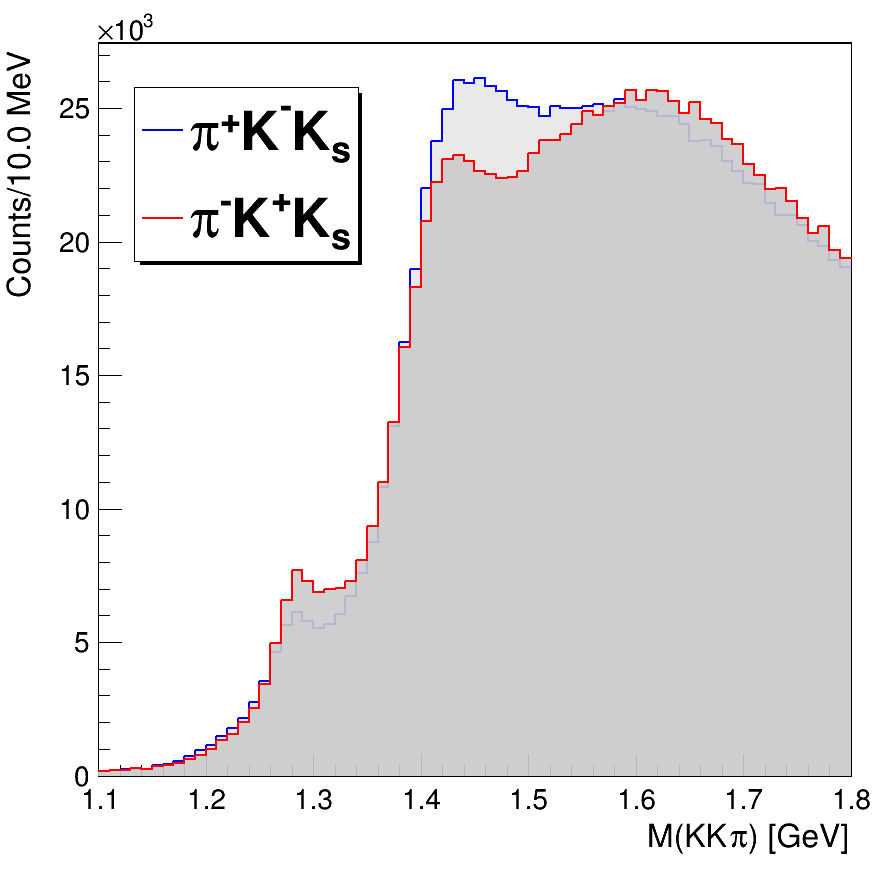

In [34]:
c.Clear()

ROOT.TGaxis.SetMaxDigits(4)

kkpi_xtitle = 'M(KK#pi) [GeV]'
kkpi_ytitle = f'Counts/{1000*(kkpi_xhigh-kkpi_xlow)/kkpi_bins:.1f}' + ' MeV'

title_hists([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_no_kstar_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_no_kstar_pimkpks.SetLineColor(ROOT.kRed)

hist_kkpi_no_kstar_pimkpks.SetFillColorAlpha(ROOT.kGray, 0.9)
hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.4)

hist_kkpi_no_kstar_pimkpks.GetYaxis().SetNoExponent(ROOT.kFALSE)

kkpi_legend = ROOT.TLegend(0.15, 0.7, 0.4, 0.9)
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pipkmks.GetPtr(), '#pi^{+}K^{-}K_{s}', 'l')
kkpi_legend.AddEntry(hist_kkpi_no_kstar_pimkpks.GetPtr(), '#pi^{-}K^{+}K_{s}', 'l')

sorted_kkpi = sort_hists_by_max([hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kkpi[0].Draw()
sorted_kkpi[1].Draw('same')
kkpi_legend.Draw()

c.Draw()

## $K^*$ Rejection

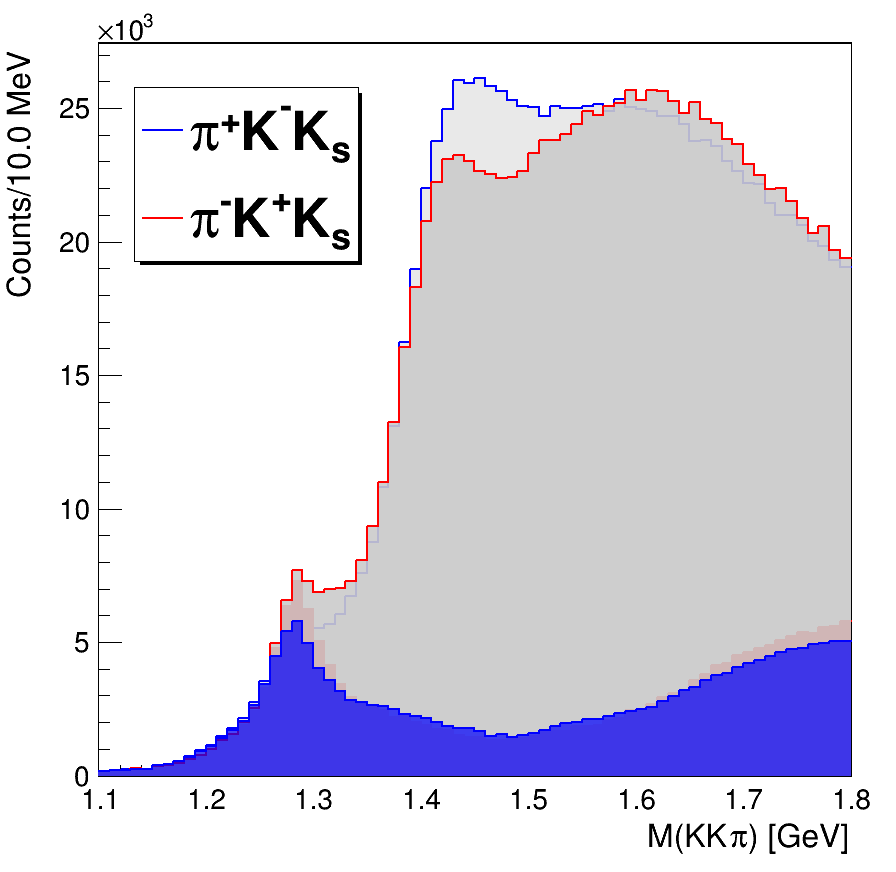

In [35]:
c.Clear()

title_hists([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_rejected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_rejected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_rejected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_rejected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_reject_hists = sort_hists_by_max([hist_kkpi_kstar_rejected_pipkmks, hist_kkpi_kstar_rejected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_reject_hists[0].Draw()
sorted_kstar_reject_hists[2].Draw('same')
sorted_kstar_reject_hists[1].Draw('same')
sorted_kstar_reject_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()



## Charged $K^*$ Selection

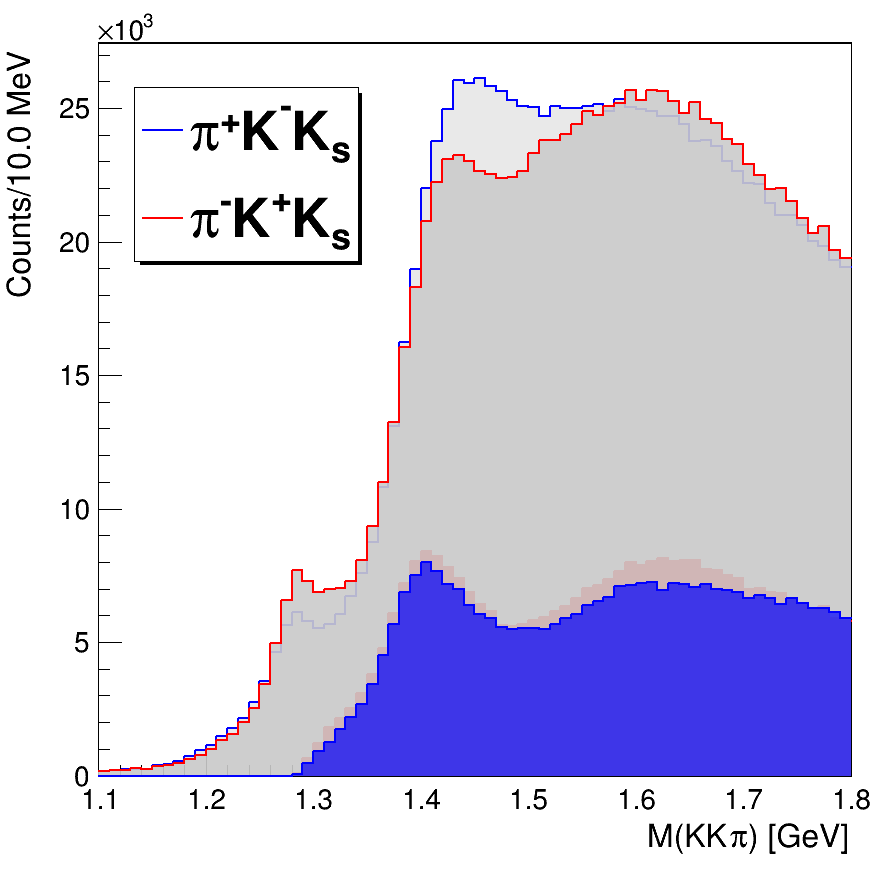

In [36]:
c.Clear()

title_hists([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_charged_selected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.7)
hist_kkpi_kstar_charged_selected_pimkpks.SetFillColor(ROOT.kRed)
hist_kkpi_kstar_charged_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_charged_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_charged_hists = sort_hists_by_max([hist_kkpi_kstar_charged_selected_pipkmks, hist_kkpi_kstar_charged_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_charged_hists[0].Draw()
sorted_kstar_select_charged_hists[2].Draw('same')
sorted_kstar_select_charged_hists[1].Draw('same')
sorted_kstar_select_charged_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Neutral $K^*$ Selection

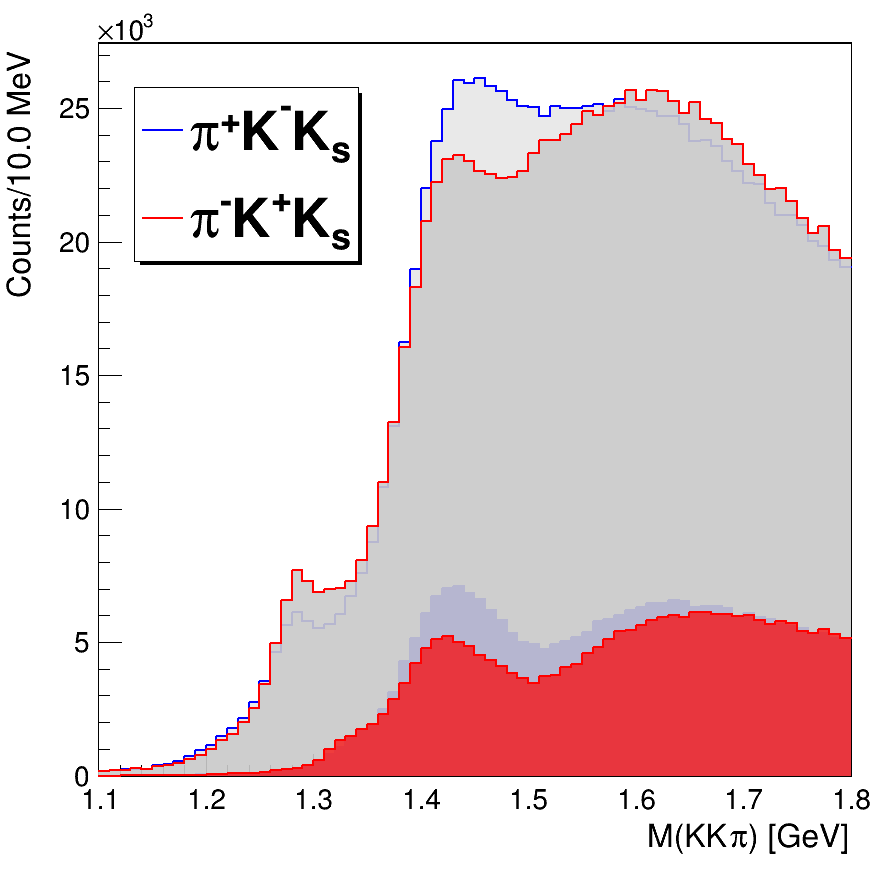

In [37]:
c.Clear()

title_hists([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_kkpi_kstar_neutral_selected_pipkmks.SetFillColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetFillColorAlpha(ROOT.kRed, 0.7)
hist_kkpi_kstar_neutral_selected_pipkmks.SetLineColor(ROOT.kBlue)
hist_kkpi_kstar_neutral_selected_pimkpks.SetLineColor(ROOT.kRed)

sorted_kstar_select_neutral_hists = sort_hists_by_max([hist_kkpi_kstar_neutral_selected_pipkmks, hist_kkpi_kstar_neutral_selected_pimkpks, hist_kkpi_no_kstar_pipkmks, hist_kkpi_no_kstar_pimkpks])

sorted_kstar_select_neutral_hists[0].Draw()
sorted_kstar_select_neutral_hists[2].Draw('same')
sorted_kstar_select_neutral_hists[1].Draw('same')
sorted_kstar_select_neutral_hists[3].Draw('same')
kkpi_legend.Draw()

c.Draw()

## Phasespace efficiency for $K^*$ Rejection 

In [38]:
# code found at: /work/halld/home/viducic/scripts/crosssection/kstar_rejection_dalitz_efficiency.ipynb

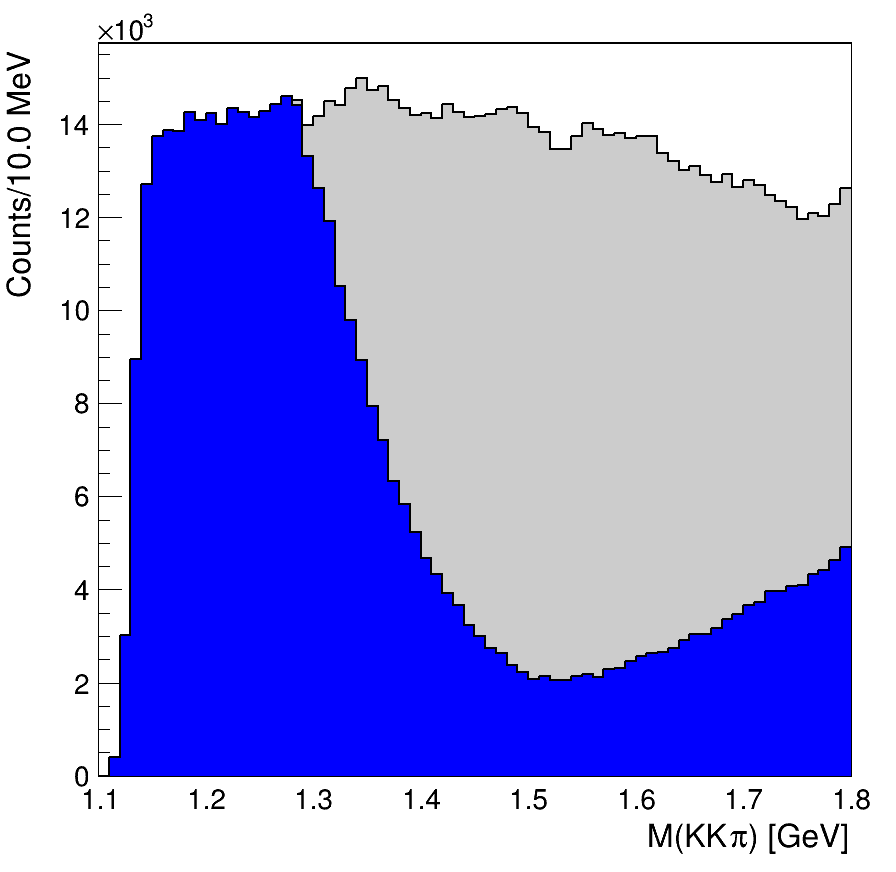

In [39]:
c.Clear()

title_hists([hist_ps_kkpi_before, hist_ps_kkpi_after], kkpi_xtitle, kkpi_ytitle, yoffset=1.4)

hist_ps_kkpi_after.SetFillColor(ROOT.kBlue)

hist_ps_kkpi_before.Draw()
hist_ps_kkpi_after.Draw('same')

c.Draw()

## $\epsilon$ corrected $KK\pi$ Distributions 

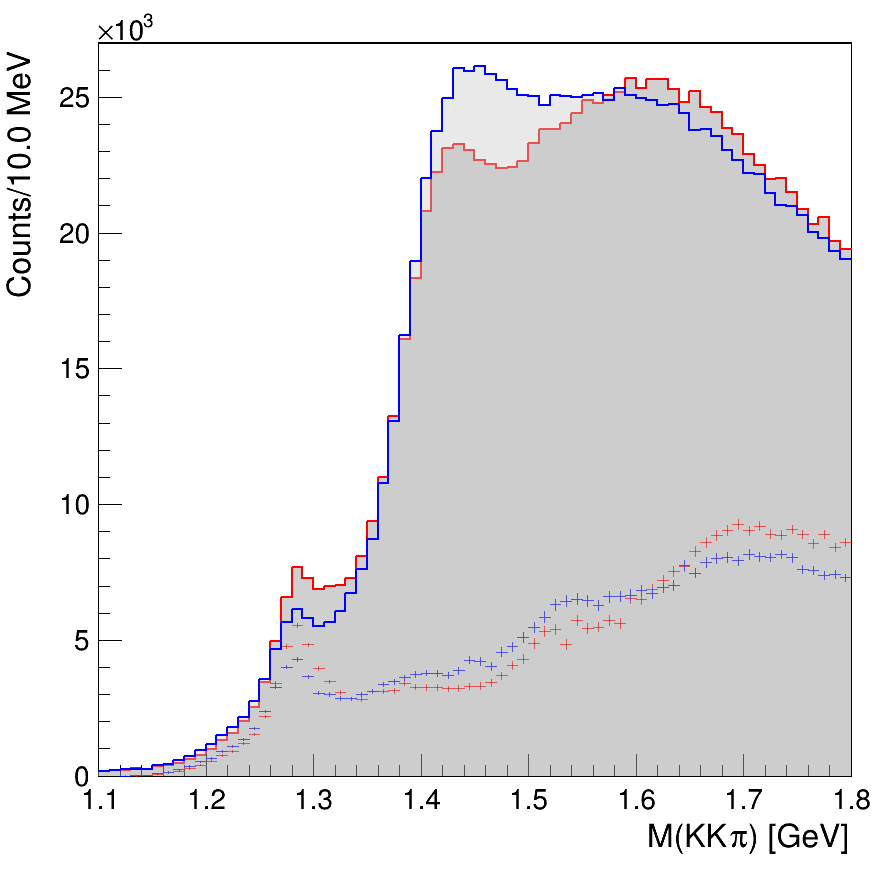

In [40]:
c.Clear()


hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlue)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kRed)

hist_eff_corrected_pimkpks.GetXaxis().SetRangeUser(1.1, 1.8)
hist_eff_corrected_pipkmks.GetXaxis().SetRangeUser(1.1, 1.8)


hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same')
hist_eff_corrected_pipkmks.Draw('same')
hist_kkpi_no_kstar_pipkmks.Draw('same')


c.Draw()

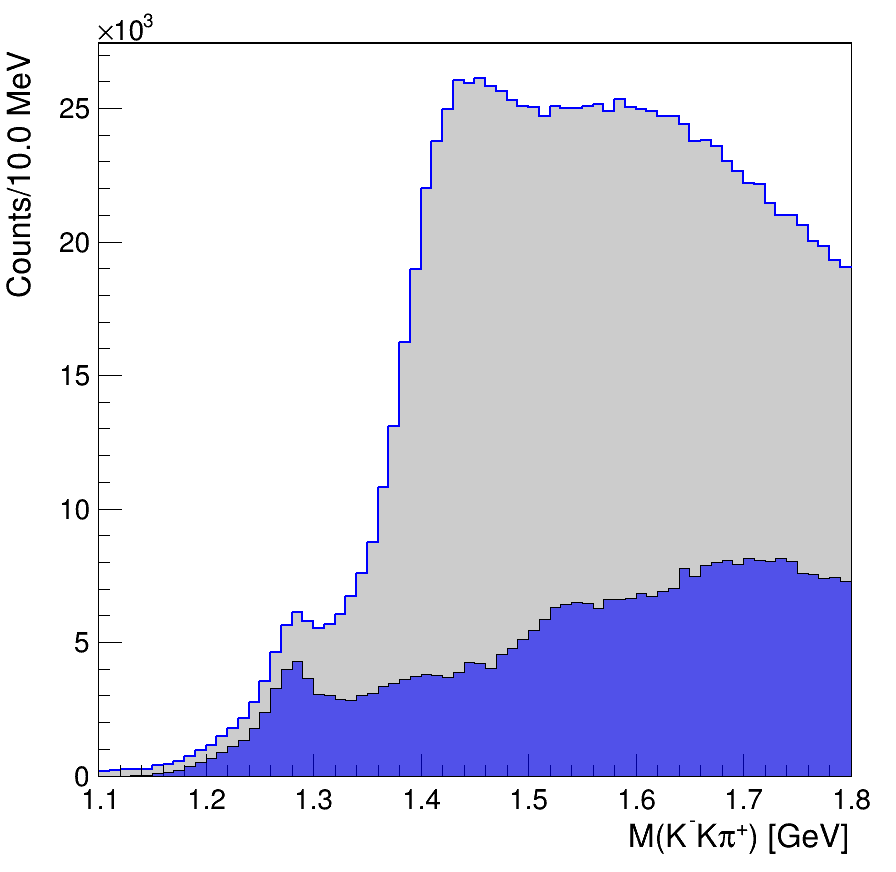

In [41]:
c.Clear()

hist_kkpi_no_kstar_pipkmks.GetXaxis().SetTitle('M(K^{-}K#pi^{+}) [GeV]')
hist_kkpi_no_kstar_pipkmks.SetFillColor(ROOT.kGray)
hist_eff_corrected_pipkmks.SetFillColorAlpha(ROOT.kBlue, 0.6)
hist_eff_corrected_pipkmks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pipkmks.Draw()
hist_eff_corrected_pipkmks.Draw('same hist')


c.Draw()

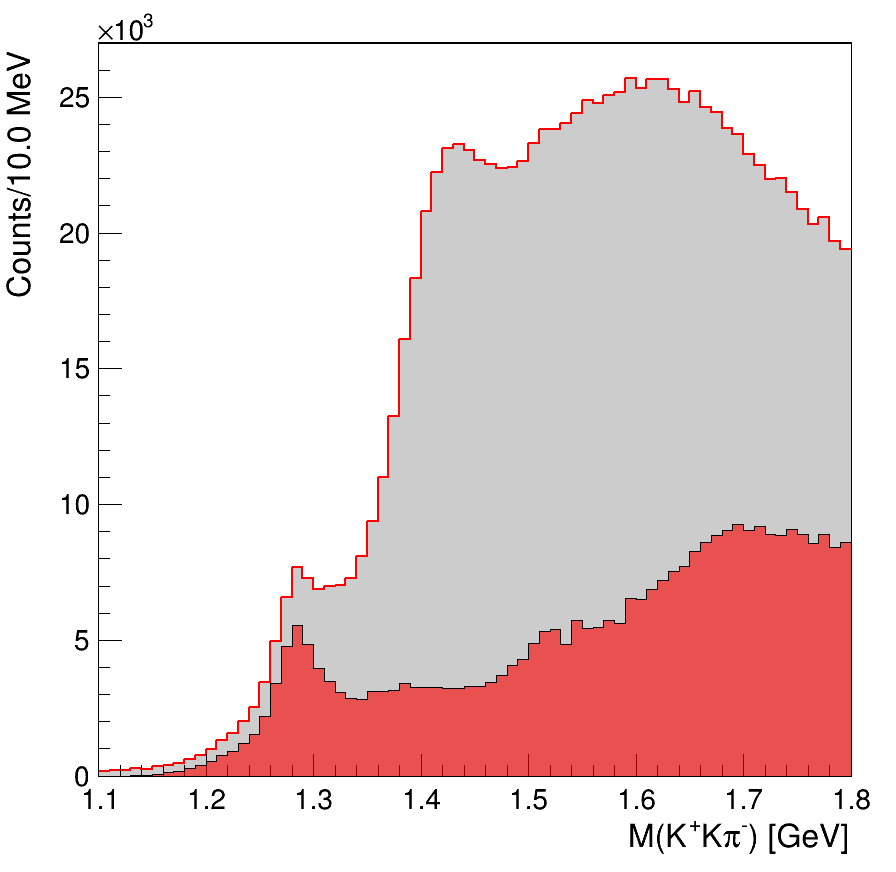

In [42]:
c.Clear()

hist_kkpi_no_kstar_pimkpks.GetXaxis().SetTitle('M(K^{+}K#pi^{-}) [GeV]')
hist_kkpi_no_kstar_pimkpks.SetFillColor(ROOT.kGray)
hist_eff_corrected_pimkpks.SetFillColorAlpha(ROOT.kRed, 0.6)
hist_eff_corrected_pimkpks.SetLineColor(ROOT.kBlack)

hist_kkpi_no_kstar_pimkpks.Draw()
hist_eff_corrected_pimkpks.Draw('same hist')


c.Draw()

## Acceptance 

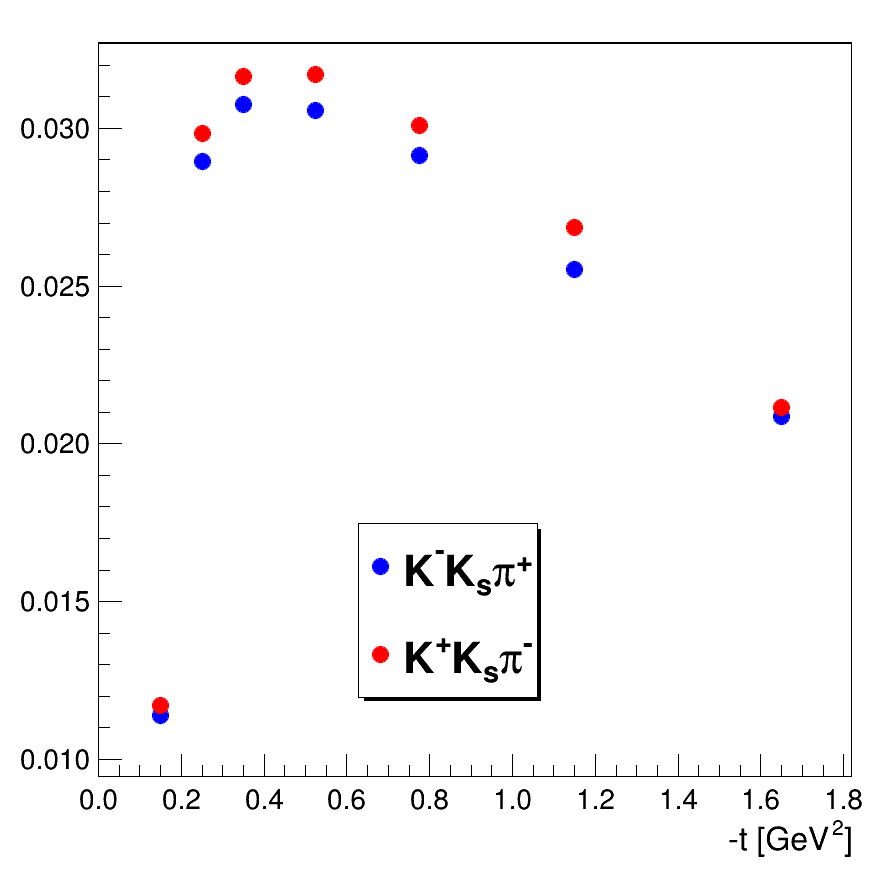

In [43]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 8:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()
    

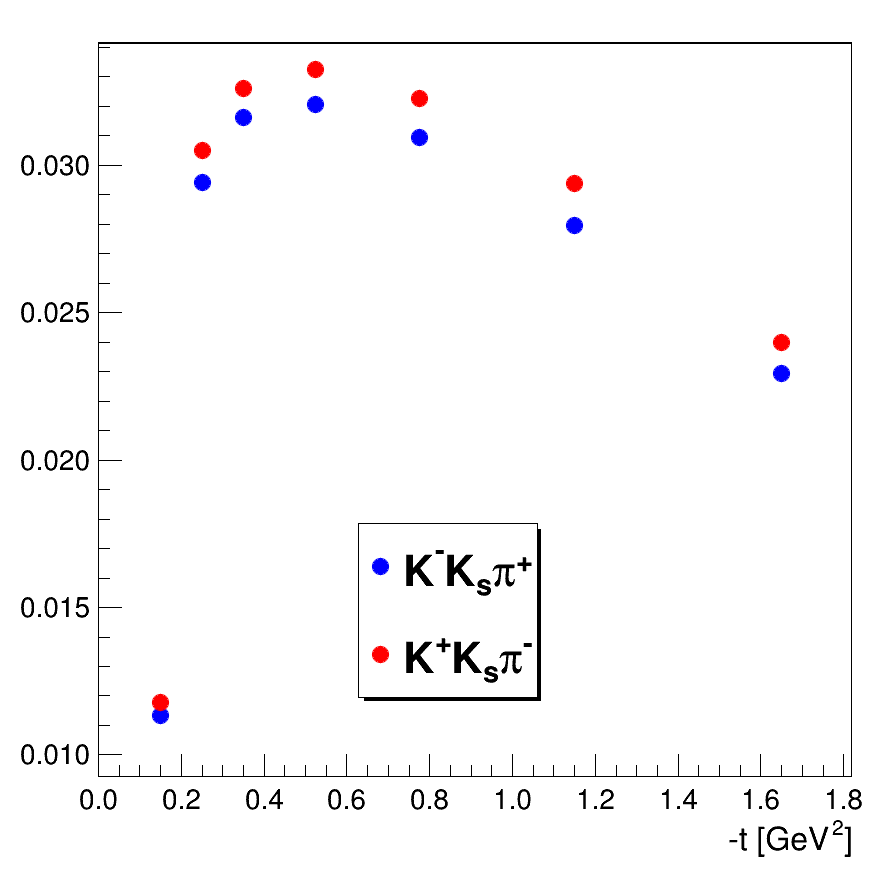

In [44]:
c.Clear()
# graph_pipkmks = ROOT.TGraphErrors()
# graph_pimkpks = ROOT.TGraphErrors()

pipkmks_bin_middles = []
pipkmks_effs = []
pimkpks_bin_middles = []
pimkpks_effs = []

for pipeff, pimeff in zip(pipkmks_eff, pimkpks_eff):

    e = pipeff[1]
    t = pipeff[2]

    if e != 9:
        continue

    t_bin_middle = (constants.T_CUT_DICT[t][0] + constants.T_CUT_DICT[t][1])/2.0
    pipkmks_effs.append(pipeff[0][0])
    pipkmks_bin_middles.append(t_bin_middle)
    pimkpks_effs.append(pimeff[0][0])
    pimkpks_bin_middles.append(t_bin_middle)

graph_pipkmks = ROOT.TGraph(len(np.array(pipkmks_bin_middles)), np.array(pipkmks_bin_middles), np.array(pipkmks_effs))
graph_pipkmks.SetMarkerSize(2)
graph_pipkmks.SetMarkerStyle(20)
graph_pipkmks.SetMarkerColor(ROOT.kBlue)

graph_pimkpks = ROOT.TGraph(len(np.array(pimkpks_bin_middles)), np.array(pimkpks_bin_middles), np.array(pimkpks_effs))
graph_pimkpks.SetMarkerSize(2)
graph_pimkpks.SetMarkerStyle(20)
graph_pimkpks.SetMarkerColor(ROOT.kRed)

acceptance_legend = ROOT.TLegend(0.4, 0.2, 0.6, 0.4)
acceptance_legend.AddEntry(graph_pipkmks, 'K^{-}K_{s}#pi^{+}', 'p')
acceptance_legend.AddEntry(graph_pimkpks, 'K^{+}K_{s}#pi^{-}', 'p')

graph_pipkmks.GetXaxis().SetRangeUser(0, 2.0)
graph_pipkmks.GetXaxis().SetTitle('-t [GeV^{2}]')
graph_pipkmks.SetTitle("E_{#gamme} = 8 GeV")
graph_pimkpks.SetTitle("E_{#gamme} = 8 GeV")

graph_pipkmks.Draw("AP")
graph_pimkpks.Draw("P")
acceptance_legend.Draw()
c.Draw()

## Data and MC Comparison

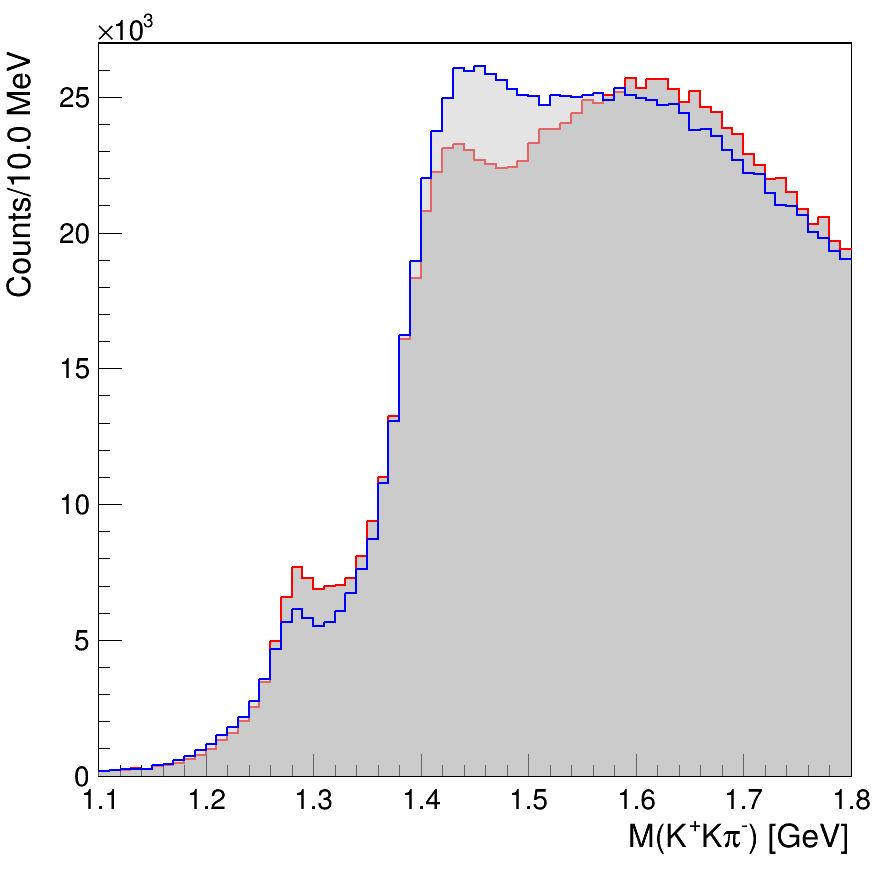

In [45]:
c.Clear()

hist_kkpi_no_kstar_pipkmks.SetFillColorAlpha(ROOT.kGray, 0.5)
hist_kkpi_no_kstar_pimkpks.Draw()
hist_kkpi_no_kstar_pipkmks.Draw('same')

c.Draw()

 FCN=4809.9 FROM MIGRAD    STATUS=CONVERGED     567 CALLS         568 TOTAL
                     EDM=2.07562e-08    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.5 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.49108e+04   1.14900e+02  -2.84415e-01   2.67554e-06
   2  p1           4.98111e-01   1.78535e-05  -1.35715e-08  -3.44296e+00
   3  p2           1.47567e-02   3.83549e-05   1.06108e-07   6.77117e+00
   4  p3           5.06334e+04   1.04364e+02   2.53611e-01   2.36057e-06
   5  p4           4.97019e-01   6.45924e-06   2.80405e-09  -1.20395e+00
   6  p5          -6.54081e-03   1.27420e-05  -3.04017e-08   4.10483e+00
   7  p6          -4.52021e+02   1.37088e+01   1.29729e-03   6.22343e-05
   8  p7           4.04699e+03   2.79111e+01  -8.01461e-04   3.13809e-05
                               ERR DEF= 0.5


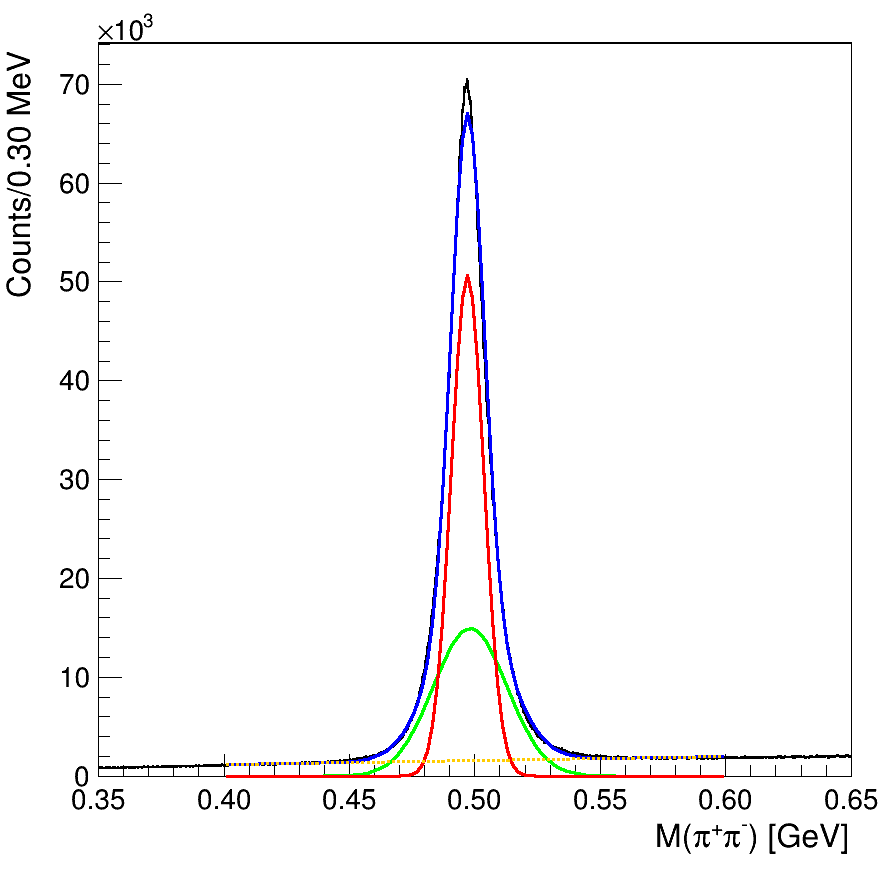

In [51]:
ks_fit = ROOT.TF1('ks_fit', '[0] * TMath::Gaus(x, [1], [2]) + [3] * TMath::Gaus(x, [4], [5]) + [6] + [7]*x', 0.4, 0.6)
ks_fit.SetParameter(0, 60000)
ks_fit.SetParameter(1, 0.5)
ks_fit.SetParameter(2, 0.01)
ks_fit.SetParameter(3, 10000)
ks_fit.SetParameter(4, 0.5)
ks_fit.SetParameter(5, 0.01)
ks_fit.SetParameter(6, 10)
ks_fit.SetParameter(7, 5000)

result = hist_ks_pipkmks_cut.Fit(ks_fit, 'LSR0')

g1 = ROOT.TF1('gaus1', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
g2 = ROOT.TF1('gaus2', '[0] * TMath::Gaus(x, [1], [2])', 0.4, 0.6)
p1 = ROOT.TF1('pol1', '[0] + [1]*x', 0.4, 0.6)

g1.SetParameters(ks_fit.GetParameter(0), ks_fit.GetParameter(1), ks_fit.GetParameter(2))
g2.SetParameters(ks_fit.GetParameter(3), ks_fit.GetParameter(4), ks_fit.GetParameter(5))
p1.SetParameters(ks_fit.GetParameter(6), ks_fit.GetParameter(7))

ks_fit.SetLineColor(ROOT.kBlue)

g1.SetLineColor(ROOT.kGreen)
g2.SetLineColor(ROOT.kRed)
p1.SetLineColor(ROOT.kOrange)
p1.SetLineStyle(2)

c.Clear()
hist_ks_pipkmks_cut.SetFillColor(ROOT.kWhite)
hist_ks_pipkmks_cut.Draw("hist E")
ks_fit.Draw('same')
g1.Draw('same')
g2.Draw('same')
p1.Draw('same')
c.Draw()